In [61]:
# 参考: https://qiita.com/InvestorX/items/f1649d046a8405bdca8e#:~:text=%3Cselect%20class%3D%22modal,2018%E5%B9%B4%E5%BA%A6%3C%2Foption

# 01 Import

import requests
import pandas as pd
from io import BytesIO

import japanize_matplotlib
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

In [36]:
url = 'https://www.jepx.jp/_download.php'
params = {'dir': 'spot_summary', 'file': 'spot_summary_2025.csv'}
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'Referer': 'https://www.jepx.jp/electricpower/market-data/spot/'
}

In [37]:
response = requests.post(url, data=params, headers=headers)
response.raise_for_status()

In [38]:
csv_bytes = response.content
df = pd.read_csv(BytesIO(csv_bytes), encoding='shift_jis')

df['受渡日'] = pd.to_datetime(df['受渡日'])

df['時刻'] = (df['時刻コード'] - 1) * 30
df['時刻'] = pd.to_timedelta(df['時刻'], unit='m')
df['受渡日時'] = df['受渡日'] + df['時刻']

df.head()

,受渡日,時刻コード,売り入札量(kWh),買い入札量(kWh),約定総量(kWh),システムプライス(円/kWh),エリアプライス北海道(円/kWh),エリアプライス東北(円/kWh),エリアプライス東京(円/kWh),エリアプライス中部(円/kWh),...,エリアプライス関西(円/kWh),エリアプライス中国(円/kWh),エリアプライス四国(円/kWh),エリアプライス九州(円/kWh),売りブロック入札総量(kWh),売りブロック約定総量(kWh),買いブロック入札総量(kWh),買いブロック約定総量(kWh),時刻,受渡日時
0,2025-04-01,1,15558150,15358850,11414250,13.50,15.41,15.41,15.41,11.00,...,11.00,11.00,7.81,11.00,3297400,757450,1295500,864600,0 days 00:00:00,2025-04-01 00:00:00
1,2025-04-01,2,16030300,15556550,11350600,13.22,14.25,14.25,14.25,11.00,...,11.00,11.00,7.73,11.00,3594000,774650,1429200,991100,0 days 00:30:00,2025-04-01 00:30:00
2,2025-04-01,3,16183050,15639050,11353350,12.89,14.01,14.01,14.01,10.87,...,10.87,10.87,7.78,10.87,3654000,761100,1450700,971350,0 days 01:00:00,2025-04-01 01:00:00
3,2025-04-01,4,16372450,15436300,11323350,12.48,13.93,13.93,13.93,10.87,...,10.87,10.87,7.68,10.87,3812350,724400,1485950,1008350,0 days 01:30:00,2025-04-01 01:30:00
4,2025-04-01,5,16386100,15401600,11222950,12.50,13.59,13.59,13.59,11.27,...,11.27,11.27,7.71,11.27,3934650,689100,1468600,1015200,0 days 02:00:00,2025-04-01 02:00:00


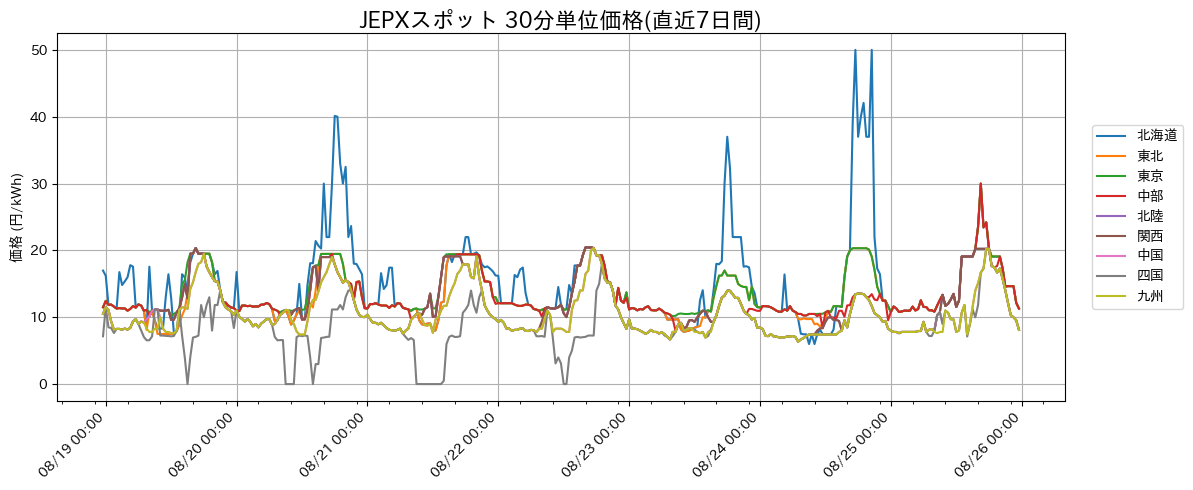

In [ ]:
area_cols = {
    '北海道': 'エリアプライス北海道(円/kWh)',
    '東北': 'エリアプライス東北(円/kWh)',
    '東京': 'エリアプライス東京(円/kWh)', 
    '中部': 'エリアプライス中部(円/kWh)', 
    '北陸': 'エリアプライス北陸(円/kWh)',
    '関西': 'エリアプライス関西(円/kWh)', 
    '中国': 'エリアプライス中国(円/kWh)', 
    '四国': 'エリアプライス四国(円/kWh)',
    '九州': 'エリアプライス九州(円/kWh)'
}

end_date = df['受渡日時'].max()
start_date = end_date - pd.Timedelta(days=7)
mask = (df['受渡日時'] >= start_date) & (df['受渡日時'] <= end_date)
df7 = df.loc[mask].copy()

fig, ax = plt.subplots(figsize=(12,5))

for label, col in area_cols.items():
    if col in df7.columns:
        ax.plot(df7['受渡日時'], df7[col], label=label)

ax.grid(True)
ax.set_ylabel('価格 (円/kWh)')

# x軸：1日毎の主目盛、フォーマットは "MM/DD 0:00"
ax.xaxis.set_major_locator(mdates.DayLocator())                 # 1日間隔（0:00に目盛）
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))      # 補助目盛（6時間ごと）
ax.tick_params(axis='x', which='minor', labelsize=8)
plt.xticks(rotation=45, ha='right')


ax.set_title('JEPXスポット 30分単位価格(直近7日間)',
             va='center', fontsize=16, weight='bold')

ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=True)


plt.subplots_adjust(top=0.88, right=0.82)
plt.tight_layout()
plt.show()
